# 094202 - מבוא לניתוח נתונים בפייתון

# אביב תשפ"ג - תרגיל בית 2

## חלק א' - עיבוד נתונים

### שאלות - כללי

,markdown עבור כל אחת מן השאלות יש לכתוב תשובה ברורה בטקסט בתא

.התשובה חייבת להיות מבוססת על פלט קוד שיופיע בתא קוד

In [1]:
#Import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('tableau-colorblind10')
import seaborn as sns
sns.set_palette("viridis")

In [2]:
#Reading the 'aviation_accident_data.csv' file:
df_accident = pd.read_csv('aviation_accident_data.csv')
df_accident

date                       type                operator  \
0             NaN             Antonov An-12B           Indonesian AF   
1             NaN             Antonov An-12B           Indonesian AF   
2             NaN             Antonov An-12B           Indonesian AF   
3             NaN            Antonov An-12BK               Soviet AF   
4             NaN            Antonov An-12BP               Soviet AF   
...           ...                        ...                     ...   
23962  2023-05-11               Hawker 900XP  Angkasa Super Services   
23963  2023-05-11  Cessna 208B Grand Caravan  Nasional Global Aviasi   
23964  2023-05-12  Cessna 208B Grand Caravan            Bar Aviation   
23965  2023-05-14            Boeing 747-4R7F                Cargolux   
23966  2023-05-15                Learjet 35A                     GFD   

       fatalities     country cat    year  
0             NaN         NaN  U1     NaN  
1             NaN         NaN  U1     NaN  
2             NaN         NaN  U1     NaN  
3             NaN      Russia  A1     NaN  
4             0.0     Eritrea  A1     NaN  
...           ...         ...  ..     ...  
23962         0.0   Indonesia  A2  2023.0  
23963         0.0   Indonesia  A2  2023.0  
23964         0.0      Uganda  A1  2023.0  
23965         0.0  Luxembourg  A2  2023.0  
23966         2.0     Germany  A1  2023.0  

[23967 rows x 7 columns]

#### :שאלה מס' 1
#### ?כמה רשומות יש בקובץ הנתונים

In [3]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        23408 non-null  object 
 1   type        23933 non-null  object 
 2   operator    23963 non-null  object 
 3   fatalities  20029 non-null  float64
 4   country     23129 non-null  object 
 5   cat         23967 non-null  object 
 6   year        23906 non-null  float64
dtypes: float64(2), object(5)
memory usage: 1.3+ MB


We can see according to the "info()" of the data frame that there are 23967 entries.

#### :שאלה מס' 2
#### ?כמה ערכים חסרים יש בכל עמודה

In [4]:
print("The number of missing values for each column:")
i = 0
for col in df_accident.columns:
    print("The number of missing values of column " + col + ": " + str(df_accident.isna().sum()[i]))
    i += 1;

The number of missing values for each column:
The number of missing values of column date: 559
The number of missing values of column type: 34
The number of missing values of column operator: 4
The number of missing values of column fatalities: 3938
The number of missing values of column country: 838
The number of missing values of column cat: 0
The number of missing values of column year: 61


We can see the number of missing values for each column at the output above.

#### :שאלה מס' 3
#### ?עבור אילו סוגי מטוסים היו לפחות 500 תאונות מתועדות

In [5]:
df_accident_cleaned_type = df_accident.dropna(subset=['type'])

gb_type = df_accident_cleaned_type.groupby('type')

list_of_types = []
i = 0
for type, type_df_accident in gb_type:
    if(gb_type.apply(len)[i] >= 500):
        #print(type)
        list_of_types.append(type)
        #print(gb_type.apply(len)[i])
    i += 1
print(list_of_types)

['Curtiss C-46A', 'Douglas C-47 (DC-3)', 'Douglas C-47A (DC-3)', 'Douglas C-47B (DC-3)']


As we can see, there are 4 types of airplanes that had at least 500 documented accidents, listed above.

#### :שאלה מס' 4
#### ?מהו אחוז התאונות המתועדות שהתרחשו בארה"ב

In [6]:

df_accident_cleaned_country = df_accident.dropna(subset=['country'])

gb_country = df_accident_cleaned_country.groupby('country', as_index=False)

num_of_rows_of_USA = gb_country.get_group('USA').apply(len)[0]

num_of_rows_of_all_countries = df_accident['country'].value_counts().sum()

(num_of_rows_of_USA / num_of_rows_of_all_countries) * 100

18.924294176142507

As we can see above, the percentage of documented accidents that occurred in 'USA' is 18.9242 %.

#### :שאלה מס' 5
#### ?איזה קטגוריית תאונה היא הקטלנית ביותר, בממוצע

In [7]:
gb_cat = df_accident.groupby('cat').mean()['fatalities']

gb_cat

C:\Users\liorb\AppData\Local\Temp\ipykernel_21228\200489776.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gb_cat = df_accident.groupby('cat').mean()['fatalities']


cat
A1     8.338233
A2     0.062728
C1     9.273478
C2     0.642857
H1    85.523810
H2     0.172710
I1     0.000000
I2     0.000000
O1     0.079533
O2     0.031250
U1     0.000000
Name: fatalities, dtype: float64

According to the output above, the deadliest 'cat' is 'H1'(Hijacking with hull-loss) with a mean of 85.5238.

### שאלות - ויזואליזציה

.בחלק זה עליכם ללוות כל תשובה בויזואליזציה (מצג גרפי)

.על הויזואליזציות להיות ברורות ולכלול כותרות ושמות מתאימים לכל הצירים עם גודל גופן קריא

.אין צורך להשתמש בשיטות של בחינת השערות שלמדנו בהרצאות האחרונות בשאלות אלה

#### :שאלה מס' 6

#### 'סעיף א

הראו את ההתפלגות של מספר ההרוגים בתאונות לפי מדינות
(עבור 5 המדינות בהן התרחש מספר
התאונות הגדול ביותר ועבור המטוסים שעבורם קיימים לפחות 500 תאונות מתועדות - מסעיף 3)

 השתמשו בשיטה המסכמת את ההתפלגות ומאפשרת השוואה בין ההתפלגויות השונות (רמז: בתרגולים ראינו שיטה
שמציגה חמישה ערכים מסכמים על ההתפלגות (מינימום, רבעון ראשון, חציון, רבעון שלישי ומקסימום).

C:\Users\liorb\AppData\Local\Temp\ipykernel_21228\2753919810.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = filtered_df[df_accident['type'] == type]


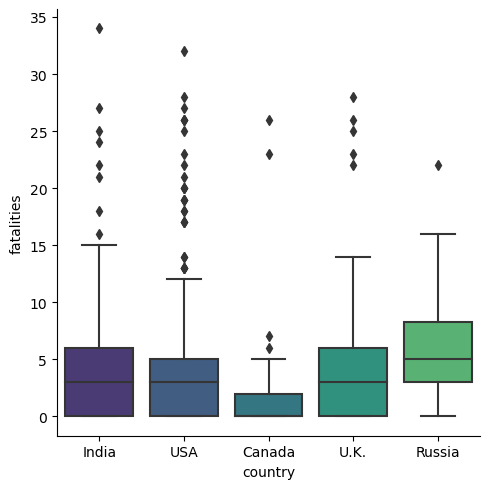

In [8]:

# Get the top 5 countries with the highest number of accidents
top_countries = df_accident['country'].value_counts().head(5).index

# Filter the DataFrame for aircraft accidents with at least 500 documented incidents
filtered_df = df_accident[(df_accident['country'].isin(top_countries))]

filtered_df = filtered_df.groupby('country').filter(lambda x: len(x) >= 500)

# Calculate the number of fatalities by country
fatalities_by_country = filtered_df.groupby('country')['fatalities'].sum()

lst = []
for type in list_of_types:
    df = filtered_df[df_accident['type'] == type]
    lst.append(df)
all_rows_df = pd.concat(lst, ignore_index=True)

facegrid = sns.catplot(x="country", y="fatalities", kind="box", data = all_rows_df);



#### 'סעיף ב

?לפי הגרף שנוצר, באיזו מדינה חציון מספר ההרוגים הוא הגבוה ביותר

According to the graph, the country with the highest median of fatalities is: Russia

#### :שאלה מס' 7


האם יש קורלציה בין מספר התאונות בכל שנה ולשנה עצמה? בסעיף זה אין צורך להראות חישוב של קו
רגרסיה, ויזואליזציה מספיקה .

Text(-3.9305555555555554, 0.5, 'Number of accidents')

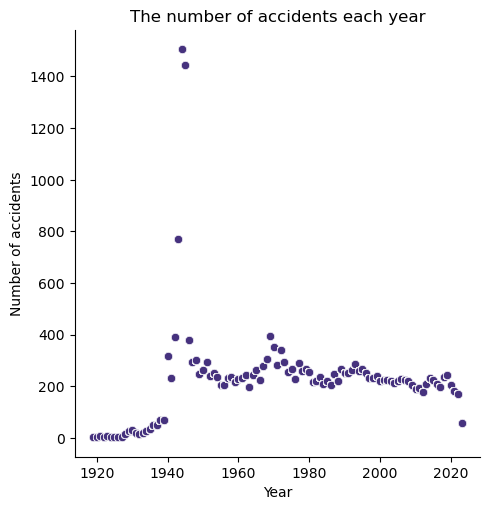

In [9]:

df_accident_cleaned_year = df_accident.dropna(subset=['year']).copy()

df_accident_cleaned_year['count'] = df_accident_cleaned_year.groupby('year')['year'].transform('count')

sns.relplot(data=df_accident_cleaned_year, x='year', y='count')

plt.title('The number of accidents each year')
plt.xlabel('Year')
plt.ylabel('Number of accidents')

According to the graph above, there is no correlation between the number of accidents each year and the year itself.

#### :שאלה מס' 8


מהם שמות עשרת המטוסים "המסוכנים" ביותר (מטוסים שעבורם התרחש מספר התאונות הגדול ביותר)?
הציגו גרף של מספר התאונות של כל אחד

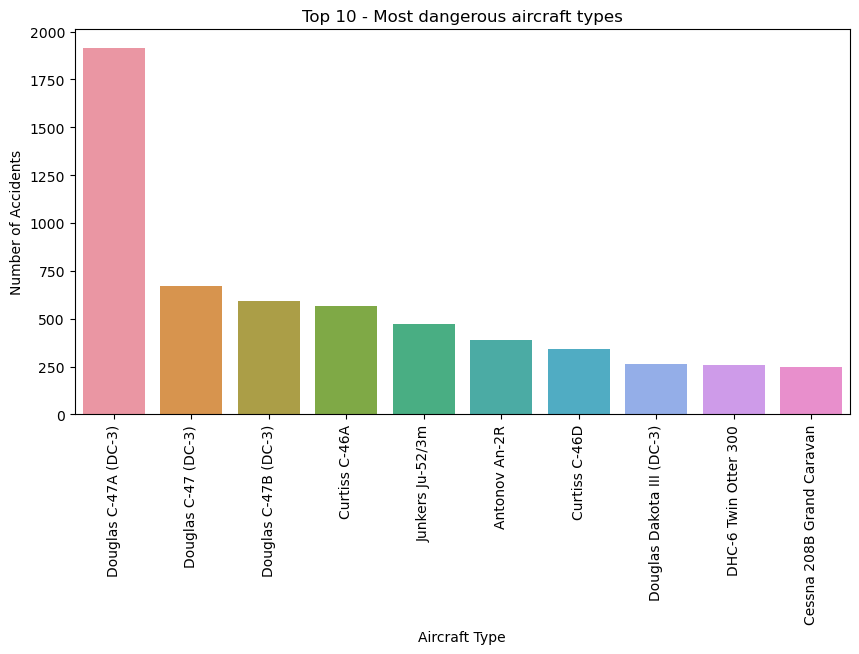

In [10]:
# Remove rows with missing 'type' values
df_accident_cleaned_type = df_accident.dropna(subset=['type']).copy()

# Count the number of accidents for each aircraft type
df_accident_cleaned_type['count'] = df_accident_cleaned_type.groupby('type')['type'].transform('count')

# Get the top 10 types with the highest number of accidents
top_10_types = df_accident_cleaned_type['type'].value_counts().head(10).index

# Filter the dataframe to include only the rows for the top 10 types
lst = []
for type in top_10_types:
    filt = df_accident['type'] == type
    lst.append(df_accident[filt])
all_rows_df = pd.concat(lst, ignore_index=True)

# Plot the number of accidents for each type
plt.figure(figsize=(10, 5))
sns.countplot(x='type', data=all_rows_df)
plt.title('Top 10 - Most dangerous aircraft types')
plt.xticks(rotation=90)
plt.xlabel('Aircraft Type')
plt.ylabel('Number of Accidents')
plt.show()

The most 10 dangerous aircraft types are:

In [11]:
top_10_types

Index(['Douglas C-47A (DC-3)', 'Douglas C-47 (DC-3)', 'Douglas C-47B (DC-3)',
       'Curtiss C-46A', 'Junkers Ju-52/3m', 'Antonov An-2R', 'Curtiss C-46D',
       'Douglas Dakota III (DC-3)', 'DHC-6 Twin Otter 300',
       'Cessna 208B Grand Caravan'],
      dtype='object')

#### :שאלה מס' 9

מי הם שלושת המפעילים "המסוכנים" ביותר (מפעילים שבצי שלהם יש לפחות מטוס מסוכן אחד מעשרת
המטוסים המסוכנים ביותר שביצע תאונה ומספר התאונות שהתבצעו בהם הוא הגדול ביותר)? הציגו את
מספר התאונות שהתרחשו עבור כל מפעיל.

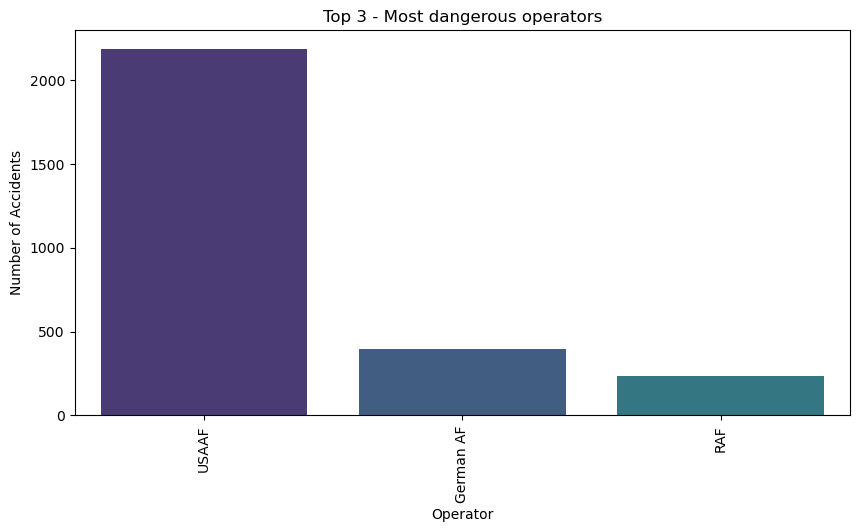

In [12]:
# Remove rows with missing 'operator' values
df_accident_cleaned_operator = df_accident.dropna(subset=['operator']).copy()

# Count the number of accidents for each operator
df_accident_cleaned_operator['count'] = df_accident_cleaned_operator.groupby('operator')['operator'].transform('count')

# Get the top operators with the highest number of accidents
top_operators = df_accident_cleaned_operator['operator'].value_counts().index

lst = []
for operator in top_operators:
    filt = (df_accident['operator'] == operator) & (df_accident['type'].isin(top_10_types))
    lst.append(df_accident[filt])

all_rows_df = pd.concat(lst, ignore_index=True)

# Count the number of accidents for each operator in the filtered DataFrame
top_3_operators = all_rows_df['operator'].value_counts().head(3)

# Plot the number of accidents for each operator
plt.figure(figsize=(10, 5))
sns.barplot(x=top_3_operators.index, y=top_3_operators.values)
plt.title('Top 3 - Most dangerous operators')
plt.xticks(rotation=90)
plt.xlabel('Operator')
plt.ylabel('Number of Accidents')
plt.show()


The most 3 dangerous operators are:

In [13]:
top_3_operators = all_rows_df['operator'].value_counts().head(3).index
top_3_operators

Index(['USAAF', 'German AF', 'RAF'], dtype='object')

#### :שאלה מס' 10

#### 'סעיף א

האם מספר התאונות של שלושת המטוסים המסוכנים ביותר פוחת במשך השנים? ספקו שני הסברים
אפשריים לתשובה שמצאתם .

<Figure size 1300x700 with 0 Axes>

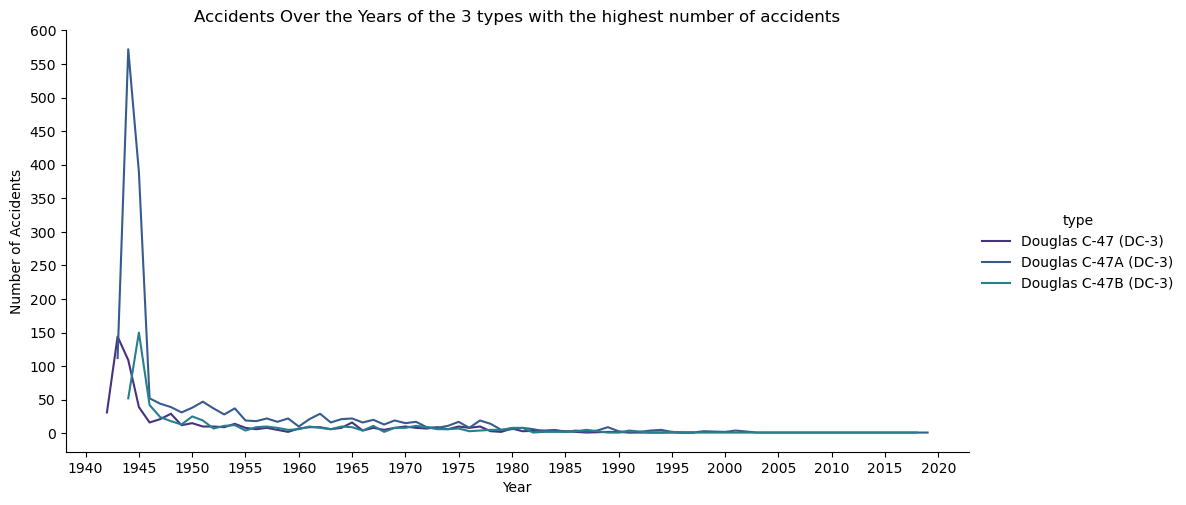

In [14]:
# Remove rows with missing 'type' values
df_accident_cleaned_type = df_accident.dropna(subset=['type']).copy()

# Group by 'type' and 'year' and count the number of accidents
df_accident_count = df_accident_cleaned_type.groupby(['type', 'year']).size().reset_index(name='count')

# Get the top 3 types with the highest number of accidents
top_3_types = df_accident_count.groupby('type')['count'].sum().nlargest(3).index

# Filter data for the top 3 types
df_top_3_types = df_accident_count[df_accident_count['type'].isin(top_3_types)]

# Set the figure size
plt.figure(figsize=(13, 7))

# Plot accidents for each type
sns.relplot(data=df_top_3_types, kind='line', x='year', y='count', hue='type', aspect=2)

plt.xticks(range(1940, 2023, 5))
plt.yticks(range(0, 650, 50))
plt.title("Accidents Over the Years of the 3 types with the highest number of accidents")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")

plt.show()


According to the following graph, there was a significant decrease from 1945 to 1990 in the number of accidents each year,
And from 1995 the number of accidents in that year onwards slowly decreases even more.

Two reasons for this:
1. These types of aircraft were supposedly used mainly in World War II, therefore after the end of the war, the uses of these military aircraft decreased significantly.
2. These are airplanes, which according to the graph were already in use in World War II 1945 (if there were documented accidents, then it is clear that they were used then),
And since then there has been a huge leap in technology,
Therefore, better military planes were invented, so the use of those old planes decreased over the years.

#### 'סעיף ב

נסו להסביר את התצפיות החריגות (רמז: התשובה לא נמצאת בקובץ הנתונים, תצטרכו לבצע מחקר קצר
ולחשוב על ההסבר )

We found that all 3 of these planes are versions of a plane whose main use was in World War II.
In addition, this type of aircraft was also used during the Indo-Pakistani War in 1947 and in addition, again by the US in the Vietnam War which ended around 1975.
In addition, we also found that since 2008 the US Air Force stopped using it, and today this type of plane (of which the three planes in the graph are different versions) is mainly used as a museum exhibit and for private flights.
Therefore, the drastic decline shortly after 1945 and the moderate decline until about 1980 (the end of the Vietnam War) and the number of accidents tending to zero since around 2010, are consistent with our brief study.

## חלק ב'- בדיקת השערות וסימולציה